In [9]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path


In [10]:
# read and split data from pickle
cwd = Path.cwd()
DHG3D_dir = cwd / '..' / 'Data'   / 'DHG2016'
data_dir = DHG3D_dir


In [4]:


data_infos2 = pd.read_csv((data_dir / 'informations_troncage_sequences.txt').resolve(), sep=' ', names=['gesture', 'finger', 'subject', 'essai', 'frame_start', 'frame_end'], decimal=',', dtype=int)
data_infos = data_infos2.set_index(['gesture', 'finger', 'subject', 'essai'])

handgestdata_angles = pd.read_pickle((data_dir / 'handgestdata_angles.pkl').resolve())
handgestdata_angles_interp = pd.read_pickle((data_dir / 'handgestdata_angles5.pkl').resolve())

unique_sets_idx = handgestdata_angles[['n_gesture', 'n_finger', 'n_subject', 'n_essai']].drop_duplicates().reset_index(drop = True ) # necessary to perform reindex
handgestdata2 = handgestdata_angles.set_index(['n_gesture', 'n_finger', 'n_subject', 'n_essai'])


In [8]:
handgestdata2

timestamp  Thumb_CMC_Spread  \
n_gesture n_finger n_subject n_essai                                
9         2        9         5         0.000000         68.466673   
                             5         0.036314         65.045053   
                             5         0.072624         64.730600   
                             5         0.108938         62.507498   
                             5         0.145251         66.615256   
...                                         ...               ...   
1         1        1         1         2.178094         40.944966   
                             1         2.214398         40.600720   
                             1         2.250698         40.392717   
                             1         2.287002         40.585717   
                             1         2.323306         43.681588   

                                      Thumb_CMC_Flex  Thumb_MCP_Flex  \
n_gesture n_finger n_subject n_essai                                   
9         2        9         5            -19.458320       49.413119   
                             5             13.359102       11.625029   
                             5             13.844109       11.697313   
                             5             13.970340       17.156335   
                             5             15.139711       18.775898   
...                                              ...             ...   
1         1        1         1             12.960569       24.856541   
                             1             13.179831       24.844930   
                             1             13.640850       24.957093   
                             1             13.939239       24.616609   
                             1             15.416915       21.688116   

                                      Thumb_IP_Flex  Index_MCP_Spread  \
n_gesture n_finger n_subject n_essai                                    
9         2        9         5            28.268402         -8.544119   
                             5            32.411274         -5.032621   
                             5            33.032847         -3.832141   
                             5            27.657603          5.189823   
                             5            32.663648         -2.773359   
...                                             ...               ...   
1         1        1         1            30.473532         58.116454   
                             1            29.962466         59.163690   
                             1            29.010633         60.173749   
                             1            28.338734         60.413078   
                             1            27.779455         60.335725   

                                      Index_MCP_Flex  Index_PIP_Flex  \
n_gesture n_finger n_subject n_essai                                   
9         2        9         5             14.405799        0.476988   
                             5             12.375699        6.715927   
                             5             12.310649        4.944385   
                             5             11.625415        8.707997   
                             5             13.126902        7.498054   
...                                              ...             ...   
1         1        1         1             29.064481       39.536155   
                             1             29.721820       39.159605   
                             1             30.318601       38.843969   
                             1             30.347254       39.125112   
                             1             30.932845       48.000786   

                                      Index_DIP_Flex  Middle_MCP_Spread  ...  \
n_gesture n_finger n_subject n_essai                                     ...   
9         2        9         5              0.364436          -3.012743  ...   
                             5              0.134926          -2.319069  ...

In [9]:
handgestdata_angles

for idx, row in unique_sets_idx.iterrows():
    #print(row.values)
    handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timediffs'] = handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timestamp'].diff()
    # vals = handgestdata2.loc[row.values,'timestamp'].diff()
    # handgestdata2.loc[row.values,'timediffs'] = vals
    

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\1841498504.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timediffs'] = handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timestamp'].diff()
C:\Users\mado\AppData\Local\Temp\ipykernel_13560\1841498504.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timediffs'] = handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timestamp'].diff()
C:\Users\mado\AppData\Local\Temp\ipykernel_13560\1841498504.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],row['n_essai']),'timediffs'] = handgestdata2.loc[(row['n_gesture'],row['n_finger'],row['n_subject'],r

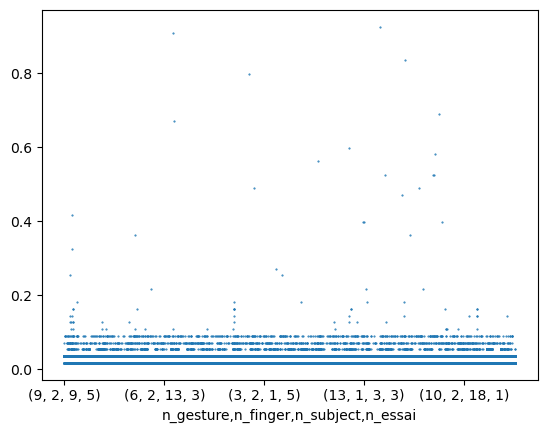

In [10]:
diff = handgestdata2.loc[:,'timediffs']

# Plot the difference
diff.plot(marker='o', linewidth=0, markersize=0.5
          )

# Show the plot
plt.show()

In [11]:
handgestdata2[handgestdata2.loc[:,'timediffs'] >= 0.5].loc[:,('timestamp', 'timediffs')]

timestamp  timediffs
n_gesture n_finger n_subject n_essai                      
6         1        4         3         0.998611   0.907829
                   20        4         2.142336   0.671752
3         2        7         3         3.630061   0.798618
14        2        3         5         2.232866   0.562757
13        2        2         1         1.543144   0.599104
12        2        5         4         2.650211   0.925763
                   2         1         3.158899   0.526483
          1        19        3         3.594349   0.835054
11        2        10        5         2.069779   0.526523
                             2         2.069779   0.526523
                   1         1         1.924258   0.580907
          1        6         2         3.104563   0.689907

In [12]:
handgestdata2.loc[(6,1,4,3), ('timestamp', 'timediffs')]

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\2696895996.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  handgestdata2.loc[(6,1,4,3), ('timestamp', 'timediffs')]


timestamp  timediffs
n_gesture n_finger n_subject n_essai                      
6         1        4         3         0.000000        NaN
                             3         0.036314   0.036314
                             3         0.054469   0.018155
                             3         0.090782   0.036314
                             3         0.998611   0.907829
...                                         ...        ...
                             3         3.649483   0.036314
                             3         3.667638   0.018155
                             3         3.703950   0.036312
                             3         3.740264   0.036314
                             3         3.776578   0.036314

[88 rows x 2 columns]

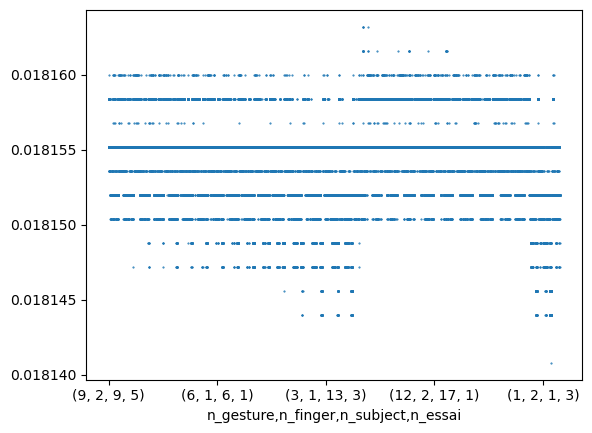

In [13]:
diff = handgestdata2[handgestdata2.loc[:,'timediffs'] <= 0.02].loc[:,('timestamp', 'timediffs')]


# Plot the difference
diff.loc[:,'timediffs'].plot(marker='o', linewidth=0, markersize=0.5
          )

# Show the plot
plt.show()

In [14]:
diff.loc[:,'timediffs'].mean()
# 0.0181546418

0.018154641800457335

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\768179987.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  handgestdata2.loc[:,'n_missing'] = handgestdata2.loc[:,'timediffs']/0.0181546418


<Axes: >

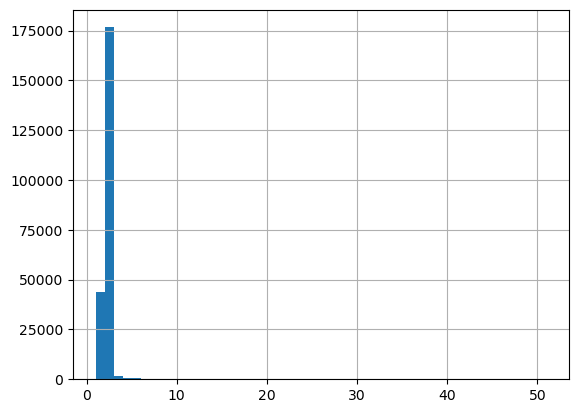

In [15]:
handgestdata2.loc[:,'n_missing'] = handgestdata2.loc[:,'timediffs']/0.0181546418
handgestdata2.loc[:,'n_missing']

handgestdata2.loc[:,'n_missing'].hist(bins = 50)

In [11]:
# Analysis of temporal length, processing

handgestdata_angles4 = pd.read_pickle((data_dir / 'handgestdata_angles5.pkl').resolve())
print(handgestdata_angles4.columns)
handgestdata_angles4.sort_values(['n_subject', 'n_gesture', 'n_finger', 'n_essai', 'timestamp'], axis='index', ascending=True, inplace=True)

indexes = handgestdata_angles4.loc[:, ['n_subject', 'n_gesture', 'n_finger', 'n_essai']].drop_duplicates()
sequenceinfos = indexes.copy().set_index(['n_subject', 'n_gesture', 'n_finger', 'n_essai'])
handgestdata_angles4.set_index(['n_subject', 'n_gesture', 'n_finger', 'n_essai'], inplace = True)
handgestdata_angles4.sort_index(inplace = True)
print(handgestdata_angles4.columns)
for (n_subject, n_gesture, n_finger, n_essai) in indexes.values:
    print(n_subject, n_gesture, n_finger, n_essai)
    sequence = handgestdata_angles4.loc[(n_subject, n_gesture, n_finger, n_essai), ('timestamp', 'label')]
    # gesture = handgestdata_angles4.loc[(handgestdata_angles4['label'] != 0) & 
    #                                     (handgestdata_angles4.index.isin([index[0], index[1], index[2], index[3]])), 
    #                                     ('timestamp', 'label')]
    gesture = sequence.loc[sequence.loc[:,'label'] != 0,:]
    handgestdata_angles4.loc[(n_subject, n_gesture, n_finger, n_essai), 'sequencespan'] = sequence.loc[:,'timestamp'].max()-sequence.loc[:,'timestamp'].min()
    handgestdata_angles4.loc[(n_subject, n_gesture, n_finger, n_essai), 'gesturespan'] = gesture.loc[:,'timestamp'].max()-gesture.loc[:,'timestamp'].min()

    sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'sequencespan'] = sequence.loc[:,'timestamp'].max()-sequence.loc[:,'timestamp'].min()
    sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'sequenceframes'] = sequence.shape[0]
    sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'gesturespan'] = gesture.loc[:,'timestamp'].max()-gesture.loc[:,'timestamp'].min()
    sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'gestureframes'] = gesture.shape[0]

sequenceinfos.to_pickle((cwd / '..' / 'PlotData' / 'sequenceinfosDHG2016.pkl').resolve())  

Index(['timestamp', 'Thumb_CMC_Spread', 'Thumb_CMC_Flex', 'Thumb_MCP_Flex',
       'Thumb_IP_Flex', 'Index_MCP_Spread', 'Index_MCP_Flex', 'Index_PIP_Flex',
       'Index_DIP_Flex', 'Middle_MCP_Spread', 'Middle_MCP_Flex',
       'Middle_PIP_Flex', 'Middle_DIP_Flex', 'Ring_MCP_Spread',
       'Ring_MCP_Flex', 'Ring_PIP_Flex', 'Ring_DIP_Flex', 'Pinky_MCP_Spread',
       'Pinky_MCP_Flex', 'Pinky_PIP_Flex', 'Pinky_DIP_Flex', 'Handpoint_X',
       'Handpoint_Y', 'Handpoint_Z', 'Handpoint_Quaternion_v1',
       'Handpoint_Quaternion_v2', 'Handpoint_Quaternion_v3',
       'Handpoint_Quaternion_s', 'label', 'interpolated', 'n_gesture',
       'n_finger', 'n_subject', 'n_essai'],
      dtype='object')
Index(['timestamp', 'Thumb_CMC_Spread', 'Thumb_CMC_Flex', 'Thumb_MCP_Flex',
       'Thumb_IP_Flex', 'Index_MCP_Spread', 'Index_MCP_Flex', 'Index_PIP_Flex',
       'Index_DIP_Flex', 'Middle_MCP_Spread', 'Middle_MCP_Flex',
       'Middle_PIP_Flex', 'Middle_DIP_Flex', 'Ring_MCP_Spread',
       'Ring_M

In [17]:
len(handgestdata_angles4)

412063

In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot
fig = make_subplots(rows=1, cols=2)

# Create a histogram for 'sequencespan'
fig.add_trace(
    go.Histogram(x=sequenceinfos['sequencespan'], nbinsx=30, name='sequencespan'),
    row=1, col=1
)

# Create a histogram for 'gesturespan'
fig.add_trace(
    go.Histogram(x=sequenceinfos['gesturespan'], nbinsx=30, name='gesturespan'),
    row=1, col=2
)
full_fig = fig.full_figure_for_development(warn = False)


# Set titles for subplots
fig.update_xaxes(title_text="Histogram of sequencespan in s", row=1, col=1)
fig.update_xaxes(title_text="Histogram of gesturespan in s", 
                row=1, 
                col=2,
                # scaleanchor="x",
                # range = full_fig.layout.xaxis.range,
                # scaleratio=1, 
                )
fig.update_yaxes(title_text="n", row=1, col=1)
fig.update_yaxes(title_text="n", row=1, col=2)

# Display the plots
fig.show()
sequenceinfos

sequencespan  gesturespan
n_subject n_gesture n_finger n_essai                           
1         1         1        1            2.323306     1.506523
                             2            1.996622     1.161672
                             3            2.105539     1.306883
                             4            2.160002     0.980166
                             5            2.395973     1.107227
...                                            ...          ...
20        14        2        1            1.833866     1.470726
                             2            1.779414     1.470741
                             3            1.379952     1.379952
                             4            1.761259     1.488899
                             5            1.507051     1.507051

[2800 rows x 2 columns]

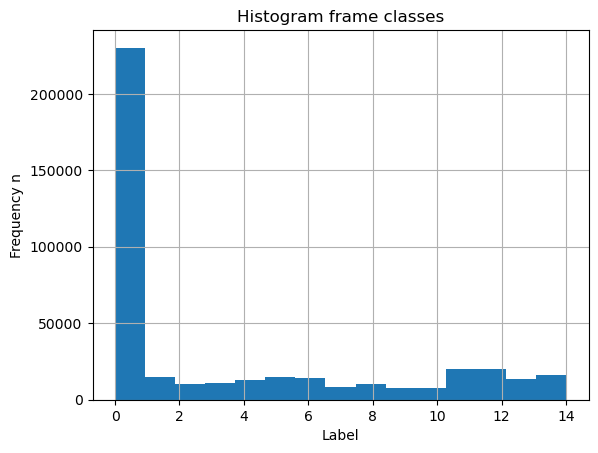

In [13]:
path = Path(r"C:\Users\Marc\OneDrive\Studium\Masterarbeit\Schreiben\figures\Plots")
fig = handgestdata_angles_interp.loc[:, 'label'].hist(bins=15)
fig.set_xlabel('Label')
fig.set_ylabel('Frequency n')
fig.set_title('Histogram frame classes')

fig.figure.savefig((path / 'Histogram_framelabels.pdf').resolve(), format='pdf', bbox_inches='tight')

plt.show()

count    2800.000000
mean        1.161517
std         0.546216
min         0.217856
25%         0.762417
50%         1.071118
75%         1.434488
max         4.974222
Name: gesturespan, dtype: float64
count    2800.000000
mean        2.653575
std         0.938721
min         0.816731
25%         1.979235
50%         2.487045
75%         3.123040
max         9.277445
Name: sequencespan, dtype: float64
Maximum number of frames:  273.9917677692765
95th Percentile of 'gesturespan': 2.1244098399999998


7

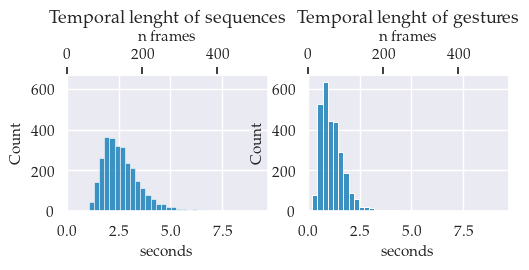

In [24]:
import importlib

import Plots_Thesis
importlib.reload(Plots_Thesis)
from Plots_Thesis import Plotter
path = Path(r"C:\Users\Marc\OneDrive\Studium\Masterarbeit\Schreiben\figures\Plots")

myplt = Plotter(output = 'thesis')

fig = myplt.plot_timeanalysis2(sequenceinfos, frame_duration=0.0181546418, fraction = 1)

#fig.savefig((path / 'Lengthanalysis.pdf').resolve(), format='pdf', bbox_inches='tight')

print(sequenceinfos.loc[:, 'gesturespan'].describe())
print(sequenceinfos.loc[:, 'sequencespan'].describe())
print('Maximum number of frames: ', sequenceinfos.loc[:, 'gesturespan'].max() / 0.0181546418)

# Calculate the 95th percentile for 'gesturespan'
percentile_95 = np.percentile(sequenceinfos.loc[:, 'gesturespan'], 95)
print(f"95th Percentile of 'gesturespan': {percentile_95}")

np.mean(sequenceinfos.loc[:, 'gesturespan']<=2.61)
np.sum(sequenceinfos.loc[:, 'sequencespan'] / 0.0181546418<60)
# np.mean(sequenceinfos.loc[:, 'gesturespan']<=0.545)

In [17]:
sequenceinfos.loc[:, 'gesturespan'].shape

(2800,)

In [27]:
odhg2024 = pd.read_pickle((cwd / '..' / 'Data' / 'ODHG2024' / 'Dataset.pkl').resolve())


sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'sequencespan'] = sequence.loc[:,'timestamp'].max()-sequence.loc[:,'timestamp'].min()
sequenceinfos.loc[(n_subject, n_gesture, n_finger, n_essai), 'gesturespan'] = gesture.loc[:,'timestamp'].max()-gesture.loc[:,'timestamp'].min()

In [30]:
indizies = odhg2024.loc[odhg2024['label']!=0,('label', 'n_fingers', 'n_sequence')].drop_duplicates()

odhg2024infos = indizies.copy().set_index(['label', 'n_fingers', 'n_sequence'], drop=False)
for label, n_finger, n_sequence in indizies.values:
    gesture = odhg2024.loc[(odhg2024['label']==label) & (odhg2024['n_fingers']==n_finger) & (odhg2024['n_sequence']==n_sequence), ('timestamp', 'label')]


    odhg2024infos.loc[(label, n_finger, n_sequence), 'gesturespan'] = gesture.loc[:,'timestamp'].max()-gesture.loc[:,'timestamp'].min()

odhg2024infos.to_pickle((cwd / '..' / 'PlotData' / 'sequenceinfosODHG2024.pkl').resolve()) 

odhg2024infos.loc[:, 'gesturespan'].describe()

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppData\Local\Temp\ipykernel_13560\3911416485.py:8: PerformanceWarning:

indexing past lexsort depth may impact performance.

C:\Users\mado\AppDat

count    280.000000
mean       1.261786
std        0.650986
min        0.350006
25%        0.779165
50%        1.049999
75%        1.599998
max        3.500000
Name: gesturespan, dtype: float64

In [45]:
odhg2024infos

label  n_fingers  n_sequence  gesturespan
label n_fingers n_sequence                                           
8     1         1               8          1           1     2.116670
11    2         1              11          2           1     3.283340
1     2         1               1          2           1     2.233330
2     2         1               2          2           1     0.966660
3     2         1               3          2           1     1.283340
...                           ...        ...         ...          ...
14    1         10             14          1          10     0.950005
8     2         10              8          2          10     0.816658
      1         10              8          1          10     0.983330
4     1         10              4          1          10     0.849998
3     2         10              3          2          10     1.033340

[280 rows x 4 columns]

In [18]:
data_infos.loc[:, 'n_gestureframes'] = data_infos.loc[:, 'frame_end'] - data_infos.loc[:, 'frame_start']
data_infos.max()

C:\Users\mado\AppData\Local\Temp\ipykernel_26992\1275283552.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



frame_start        203
frame_end          252
n_gestureframes    149
dtype: int32

In [49]:
sequenceinfos

sequencespan  gesturespan
n_subject n_gesture n_finger n_essai                           
1         1         1        1            2.323306     1.506523
                             2            1.996622     1.161672
                             3            2.105539     1.306883
                             4            2.160002     0.980166
                             5            2.395973     1.107227
...                                            ...          ...
20        14        2        1            1.833866     1.470726
                             2            1.779414     1.470741
                             3            1.379952     1.379952
                             4            1.761259     1.488899
                             5            1.507051     1.507051

[2800 rows x 2 columns]

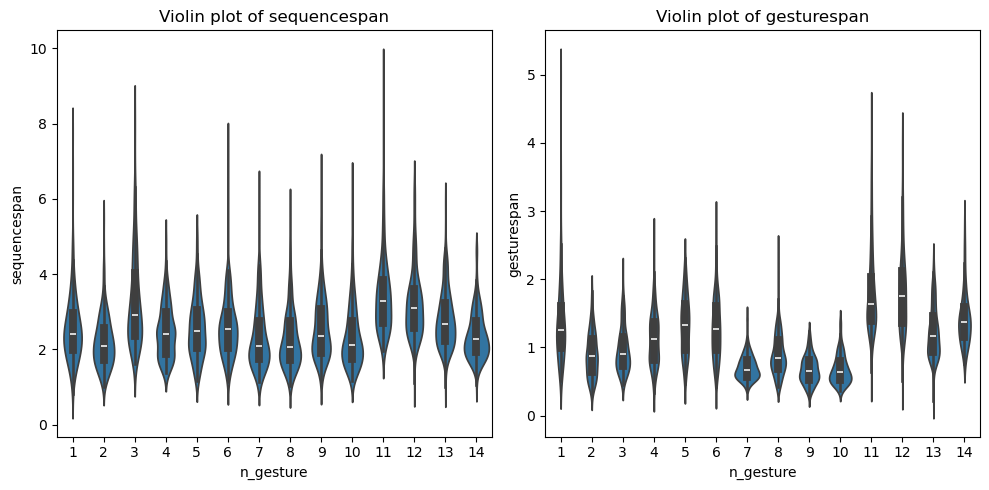

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sequenceinfos = sequenceinfos.reset_index()
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a violin plot for 'sequencespan'
sns.violinplot(x = 'n_gesture', y='sequencespan', data=sequenceinfos, ax=axs[0])
axs[0].set_title('Violin plot of sequencespan')

# Create a violin plot for 'gesturespan'
sns.violinplot(x = 'n_gesture', y='gesturespan', data=sequenceinfos, ax=axs[1])
axs[1].set_title('Violin plot of gesturespan')

# Display the plots
plt.tight_layout()
plt.show()

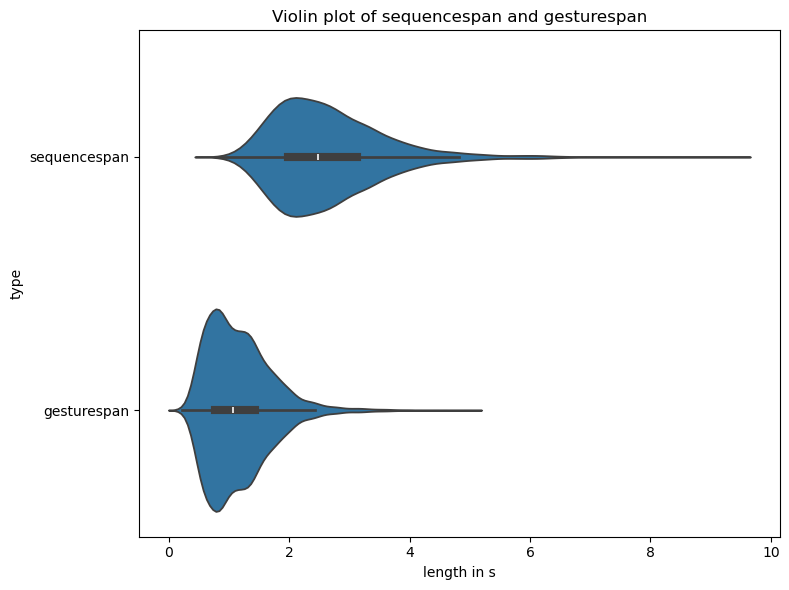

In [48]:
import pandas as pd

# Combine 'sequencespan' and 'gesturespan' into a single DataFrame
data_combined = pd.concat([
    sequenceinfos['sequencespan'].dropna().reset_index(drop=True).rename('length in s'),
    sequenceinfos['gesturespan'].dropna().reset_index(drop=True).rename('length in s')
], axis=0, keys=['sequencespan', 'gesturespan'], names=['type']).reset_index()

# Plot the combined data as two halves of the same violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='length in s', y='type', data=data_combined, linewidth=1.3)
plt.title('Violin plot of sequencespan and gesturespan')
plt.tight_layout()
plt.show()